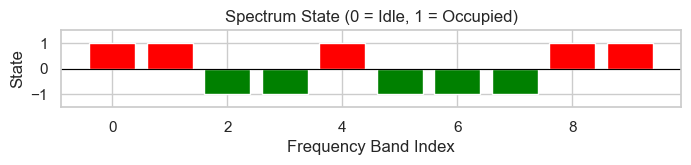

Step 1: Action: 0, Reward: -1.1


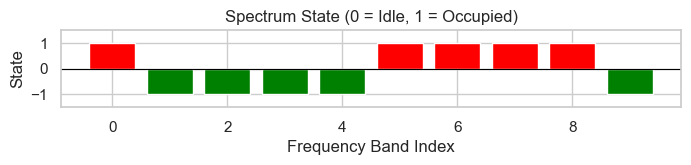

Step 2: Action: 1, Reward: 0.9


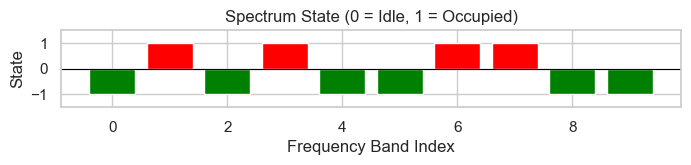

Step 3: Action: 0, Reward: 0.9


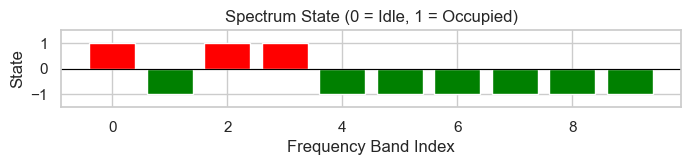

Step 4: Action: 4, Reward: 0.9


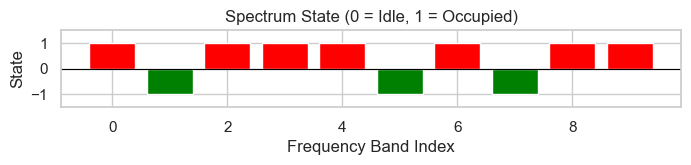

Step 5: Action: 1, Reward: 0.9


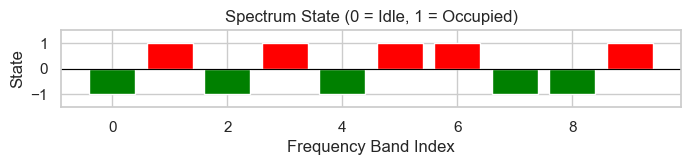

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class SpectrumEnvironment:
    def __init__(self, num_bands=10, energy_cost=0.1):
        self.num_bands = num_bands  # Total number of frequency bands
        self.energy_cost = energy_cost  # Penalty for sensing
        self.state = self._generate_spectrum_state()  # Current state of the spectrum
        self.total_reward = 0  # Track total reward for visualization

    def _generate_spectrum_state(self):
        """Randomize the spectrum state: 0 (idle) or 1 (occupied)."""
        return np.random.choice([0, 1], size=self.num_bands)

    def step(self, action):
        """
        Simulate sensing a specific band.
        action: Integer representing the index of the band to sense.
        Returns:
            state: Updated spectrum state.
            reward: Reward based on action.
        """
        reward = 0
        # Reward for sensing an idle band
        if self.state[action] == 0:
            reward = 1
        else:  # Penalty for sensing an occupied band
            reward = -1
        
        # Energy cost is deducted regardless of the outcome
        reward -= self.energy_cost
        self.total_reward += reward

        # Randomize the spectrum state for the next step
        self.state = self._generate_spectrum_state()

        return self.state, reward

    def reset(self):
        """Reset the environment to an initial state."""
        self.state = self._generate_spectrum_state()
        self.total_reward = 0
        return self.state

    def render(self):
        """Visualize the spectrum state."""
        plt.figure(figsize=(8, 1))
        heights = [-1 if x == 0 else 1 for x in self.state]  # Negative for green (idle), positive for red (occupied)
        colors = ['green' if x == 0 else 'red' for x in self.state]  # Green for idle, red for occupied
        
        plt.bar(range(self.num_bands), heights, color=colors)
        plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
        plt.title("Spectrum State (-1 = Idle, 1 = Occupied)")
        plt.xlabel("Frequency Band Index")
        plt.ylabel("State")
        plt.ylim(-1.5, 1.5)  # Adjust y-axis limits to better display the bars
        plt.show()


# Create and test the environment
env = SpectrumEnvironment(num_bands=10)

# Reset the environment and visualize the initial state
state = env.reset()
env.render()

# Simulate a few steps with random actions
for step in range(5):
    action = random.randint(0, env.num_bands - 1)  # Randomly select a band to sense
    next_state, reward = env.step(action)
    print(f"Step {step + 1}: Action: {action}, Reward: {reward}")
    env.render()
    time.sleep(1)  # Pause for visualization


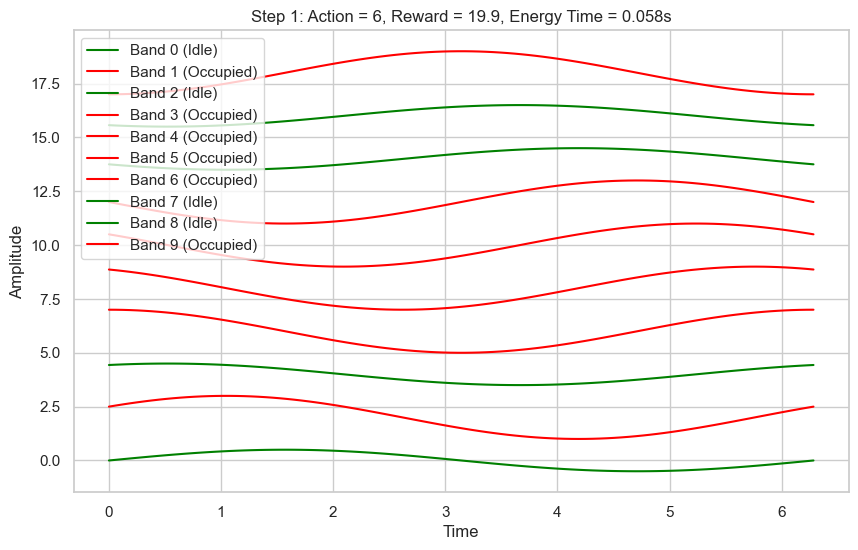

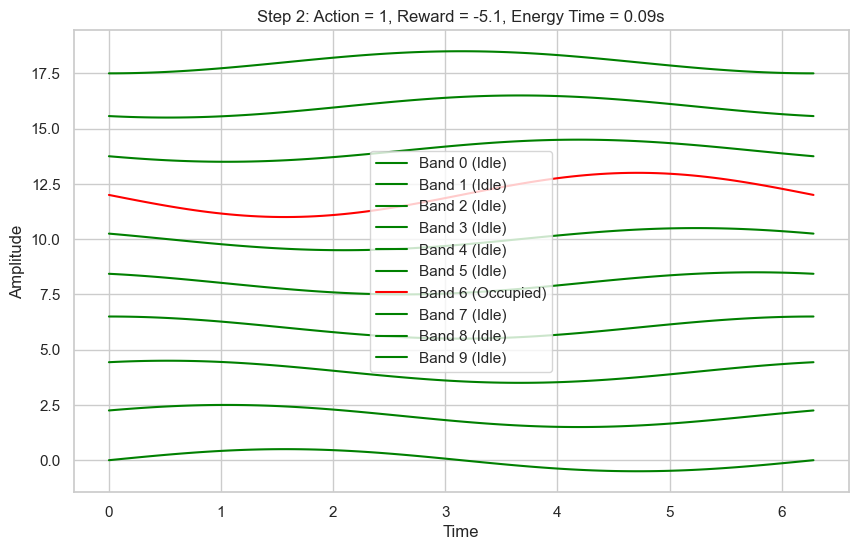

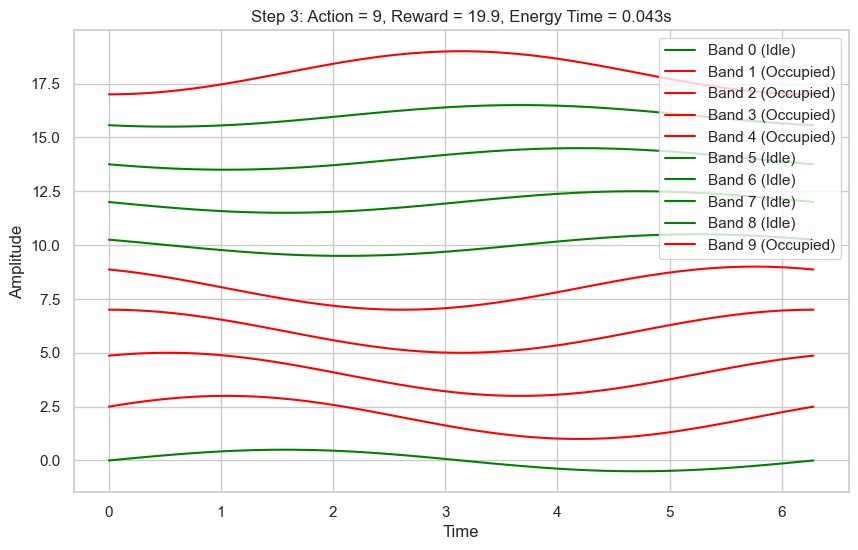

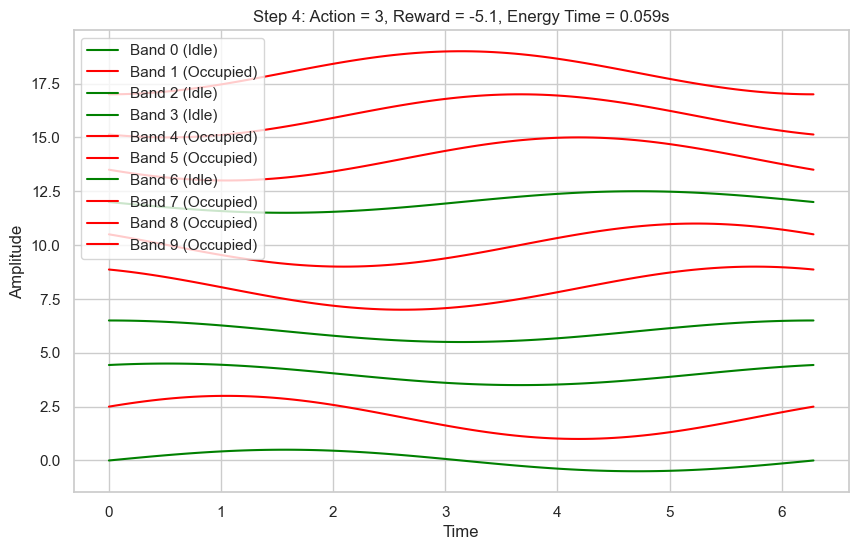

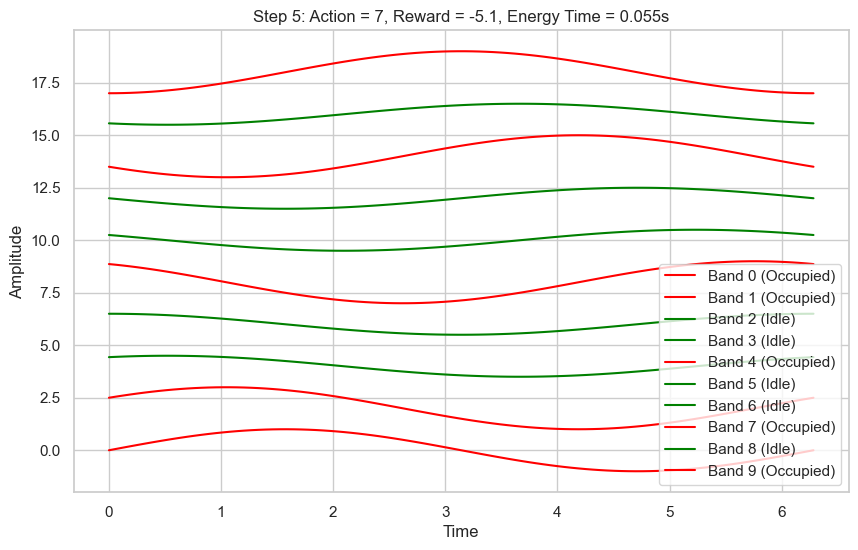

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import time

class SpectrumEnvironment:
    def __init__(self, num_bands=10, energy_cost=0.1):
        self.num_bands = num_bands  # Total number of frequency bands
        self.energy_cost = energy_cost  # Penalty for sensing
        self.state = self._generate_spectrum_state()  # Current state of the spectrum
        self.total_reward = 0  # Track total reward for visualization
        self.energy_values = [0] * self.num_bands  # Placeholder for energy calculations

    def _generate_spectrum_state(self):
        """Randomize the spectrum state: 0 (idle) or 1 (occupied)."""
        return np.random.choice([0, 1], size=self.num_bands)

    def step(self, action):
        """
        Simulate sensing a specific band.
        action: Integer representing the index of the band to sense.
        Returns:
            state: Updated spectrum state.
            reward: Reward based on action.
        """
        reward = 0
        energy_time = round(random.uniform(0.01, 0.1), 3)  # Random energy calculation time
        self.energy_values[action] = energy_time

        # Reward for sensing an idle band
        if self.state[action] == 0:
            reward = 20
        else:  # Penalty for sensing an occupied band
            reward = -5
        
        # Energy cost is deducted regardless of the outcome
        reward -= self.energy_cost
        self.total_reward += reward

        # Randomize the spectrum state for the next step
        self.state = self._generate_spectrum_state()

        return self.state, reward, energy_time

    def reset(self):
        """Reset the environment to an initial state."""
        self.state = self._generate_spectrum_state()
        self.total_reward = 0
        self.energy_values = [0] * self.num_bands
        return self.state

    def render(self, step, action, reward, energy_time):
        """Visualize the spectrum state with sinusoidal waves."""
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.linspace(0, 2 * np.pi, 100)

        # Plot sinusoidal signals
        for i in range(self.num_bands):
            amplitude = 1 if self.state[i] == 1 else 0.5
            color = 'red' if self.state[i] == 1 else 'green'
            y = amplitude * np.sin(x + i * np.pi / 6)
            ax.plot(x, y + i * 2, color=color, label=f'Band {i} ({["Idle", "Occupied"][self.state[i]]})')

        ax.set_title(f"Step {step}: Action = {action}, Reward = {reward}, Energy Time = {energy_time}s")
        ax.set_xlabel("Time")
        ax.set_ylabel("Amplitude")
        ax.legend()
        plt.show()


# Create and test the environment
env = SpectrumEnvironment(num_bands=10)

# Reset the environment and visualize the initial state
state = env.reset()

# Simulate a few steps with random actions
for step in range(5):
    action = random.randint(0, env.num_bands - 1)  # Randomly select a band to sense
    next_state, reward, energy_time = env.step(action)
    env.render(step + 1, action, reward, energy_time)
    time.sleep(1)  # Pause for visualization


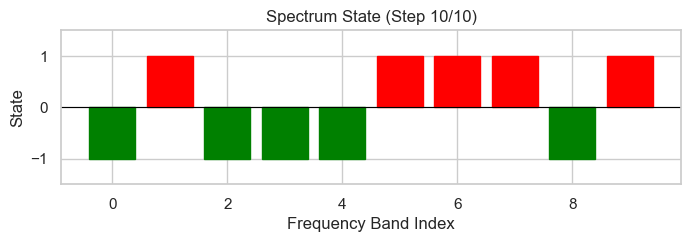

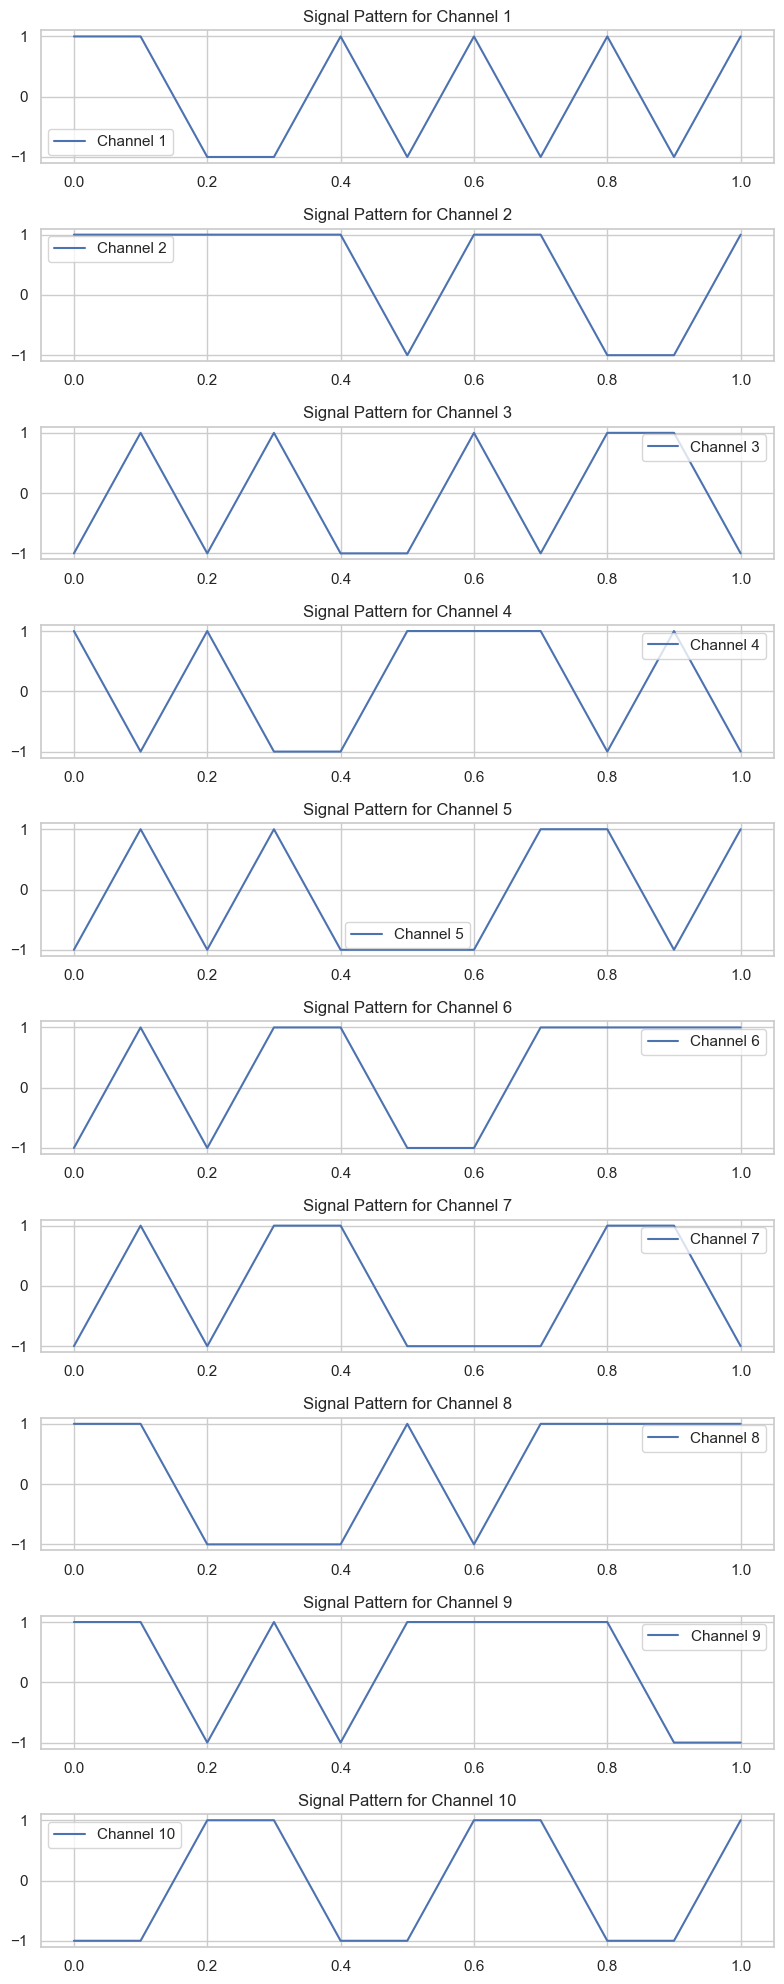

Total Reward after 10 steps: -61.1


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import time


class SpectrumEnvironment:
    def __init__(self, num_bands=10, energy_cost=0.1):
        self.num_bands = num_bands  # Total number of frequency bands
        self.energy_cost = energy_cost  # Penalty for sensing
        self.state = self._generate_spectrum_state()  # Current state of the spectrum
        self.total_reward = 0  # Track total reward
        self.rewards = []  # Track rewards for each step
        self.channel_history = [[] for _ in range(num_bands)]  # Store states for each channel

    def _generate_spectrum_state(self):
        """Randomize the spectrum state: 0 (idle) or 1 (occupied)."""
        return np.random.choice([0, 1], size=self.num_bands)

    def step(self, action):
        """
        Simulate sensing a specific band.
        action: Integer representing the index of the band to sense.
        Returns:
            state: Updated spectrum state.
            reward: Reward based on action.
        """
        reward = 0
        # Reward for sensing an idle band
        if self.state[action] == 0:
            reward = 20
        else:  # Penalty for sensing an occupied band
            reward = -15

        # Deduct energy cost
        reward -= self.energy_cost
        self.total_reward += reward
        self.rewards.append(reward)
        
        # Record the current state in the history
        for i in range(self.num_bands):
            self.channel_history[i].append(self.state[i])
    
        # Randomize the spectrum state for the next step
        self.state = self._generate_spectrum_state()
        return self.state, reward

    def reset(self):
        """Reset the environment to an initial state."""
        self.state = self._generate_spectrum_state()
        self.total_reward = 0
        self.rewards = []
        return self.state


# Animated rendering
def animate_spectrum(env, steps):
    fig, ax = plt.subplots(figsize=(8, 2))
    bars = ax.bar(range(env.num_bands), [-1] * env.num_bands, color="green")
    ax.axhline(0, color="black", linewidth=0.8)
    ax.set_title("Spectrum State (-1 = Idle, 1 = Occupied)")
    ax.set_xlabel("Frequency Band Index")
    ax.set_ylabel("State")
    ax.set_ylim(-1.5, 1.5)

    def update(frame):
        action = random.randint(0, env.num_bands - 1)  # Randomly select a band to sense
        next_state, reward = env.step(action)
        heights = [-1 if x == 0 else 1 for x in next_state]
        colors = ["green" if x == 0 else "red" for x in next_state]
        for bar, h, c in zip(bars, heights, colors):
            bar.set_height(h)
            bar.set_color(c)
        ax.set_title(f"Spectrum State (Step {frame + 1}/{steps})")
        return bars

    ani = animation.FuncAnimation(fig, update, frames=steps, repeat=False)
    ani.save("spectrum_animation.gif", fps=1,writer='pillow')
    plt.show()


# Plot signal patterns for each channel
def plot_signal_patterns(env):
    t = np.linspace(0, 1, len(env.channel_history[0]))  # Time axis based on history length
    fig, axes = plt.subplots(env.num_bands, 1, figsize=(8, 2 * env.num_bands))
    for i, ax in enumerate(axes):
        # Generate a sine wave for the current channel
        # Modify the sine wave based on the channel history (value-by-value modulation)
        modulation = np.where(np.array(env.channel_history[i]) == 0, -1, 1)
        ax.plot(t, modulation, label=f"Channel {i + 1}")
        ax.set_title(f"Signal Pattern for Channel {i + 1}")
        ax.legend()
    
    plt.tight_layout()
    plt.show()






# Create and test the environment
env = SpectrumEnvironment(num_bands=10)

# Reset the environment
env.reset()

# Animate spectrum state updates
steps = 10
animate_spectrum(env, steps)
# Plot sinusoidal signal patterns
plot_signal_patterns(env)

# Display the total reward after steps
print(f"Total Reward after {steps} steps: {env.total_reward}")